# Medical  Cost  personal insurance Analysis and Prediction

In [169]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [170]:
#reading the csv files and listing the datas

meddata = pd.read_csv(r"C:\Users\Premium\Downloads\medical_cost_insurance.csv")
meddata.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# DATA ANALYSIS

In [171]:
meddata.shape

(1338, 7)

In [172]:
meddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [173]:
# Checking for null values 

meddata.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [174]:
meddata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [175]:
# General statistical description of Categorical variables
meddata.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# DataVisualization

# Bar Plots

### CHARGES BASED ON REGION

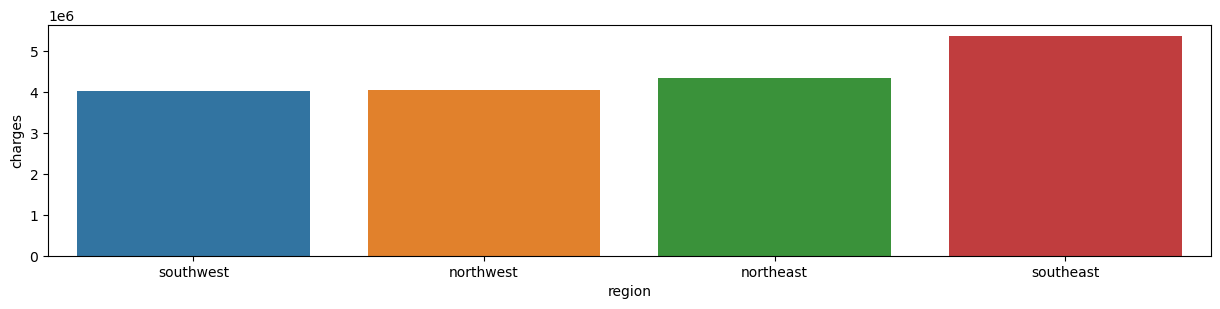

In [176]:
charges = meddata['charges'].groupby(meddata.region).sum().sort_values(ascending = True)
plt.figure(figsize=(15,3))
ax = sns.barplot(x = charges.index, y = charges)

### CHARGES BASED ON GENDER AND REGION

<AxesSubplot:xlabel='region', ylabel='charges'>

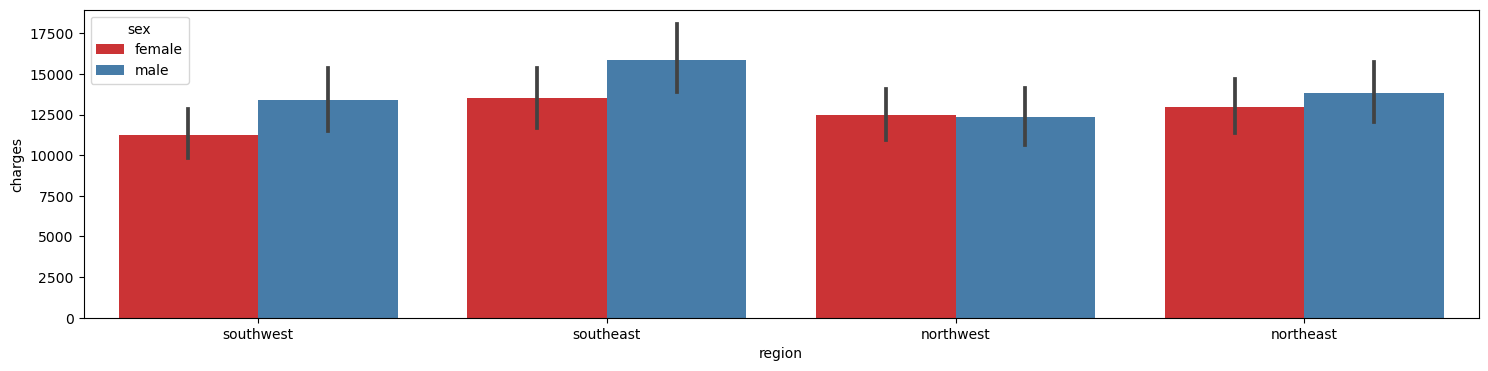

In [177]:
plt.figure(figsize=(18,4))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'Set1')

#### Charges by region and smoking behavior

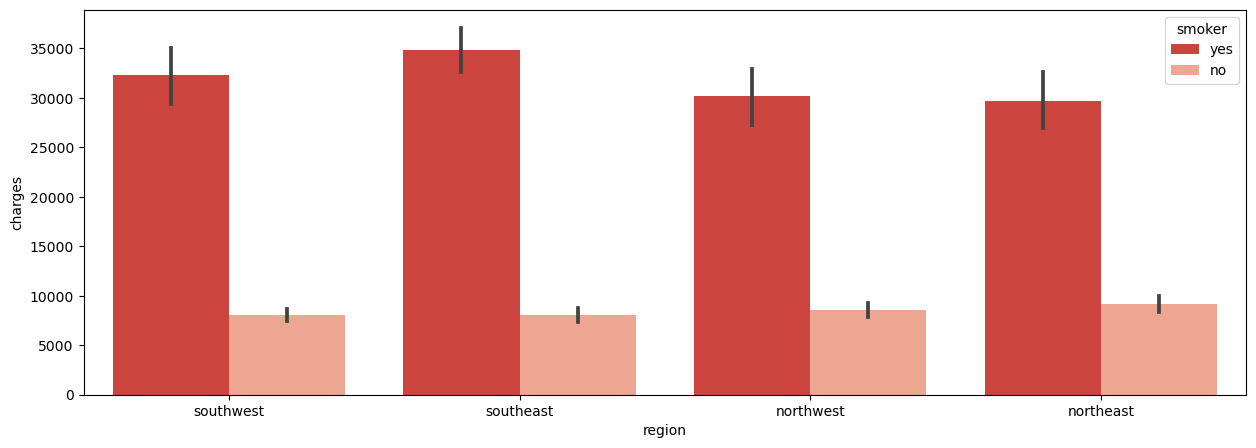

In [178]:
f, ax = plt.subplots(1, 1, figsize = (15, 5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Reds_r')

# Converting the categorical values to numerical data for further analysis

In [179]:
meddata.sample(4)

,age,sex,bmi,children,smoker,region,charges
990,26,female,19.800,1,no,southwest,3378.91000
777,45,male,39.805,0,no,northeast,7448.40395
564,18,female,32.120,2,no,southeast,2801.25880
180,58,male,28.595,0,no,northwest,11735.87905


In [180]:
meddata['sex'].unique()

array(['female', 'male'], dtype=object)

In [181]:
meddata['sex'].map({'female':0,'male':1}) ### Mapping the values of female and male as 0 & 1.

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [182]:
meddata['sex']=meddata['sex'].map({'female':0,'male':1})

In [183]:
meddata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [184]:
meddata['smoker']=meddata['smoker'].map({'yes':1,'no':0}) ## Mapping the values of yes and no to 1s and 0s.

In [185]:
meddata.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [186]:
meddata['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [187]:
meddata['region']=meddata['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}) # mapping string values to 1,2,3,4.

In [188]:
meddata.sample(10)

,age,sex,bmi,children,smoker,region,charges
18,56,1,40.300,0,0,1,10602.38500
715,60,1,28.900,0,0,1,12146.97100
907,44,0,32.340,1,0,2,7633.72060
971,34,0,23.560,0,0,4,4992.37640
1310,42,1,26.315,1,0,3,6940.90985
465,30,0,28.380,1,1,2,19521.96820
1298,33,1,27.455,2,0,3,5261.46945
51,21,0,33.630,2,0,3,3579.82870
1161,34,1,42.130,2,0,2,5124.18870
992,50,0,31.600,2,0,1,10118.42400


In [189]:
meddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


# Data Correlation

In [190]:
meddata.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

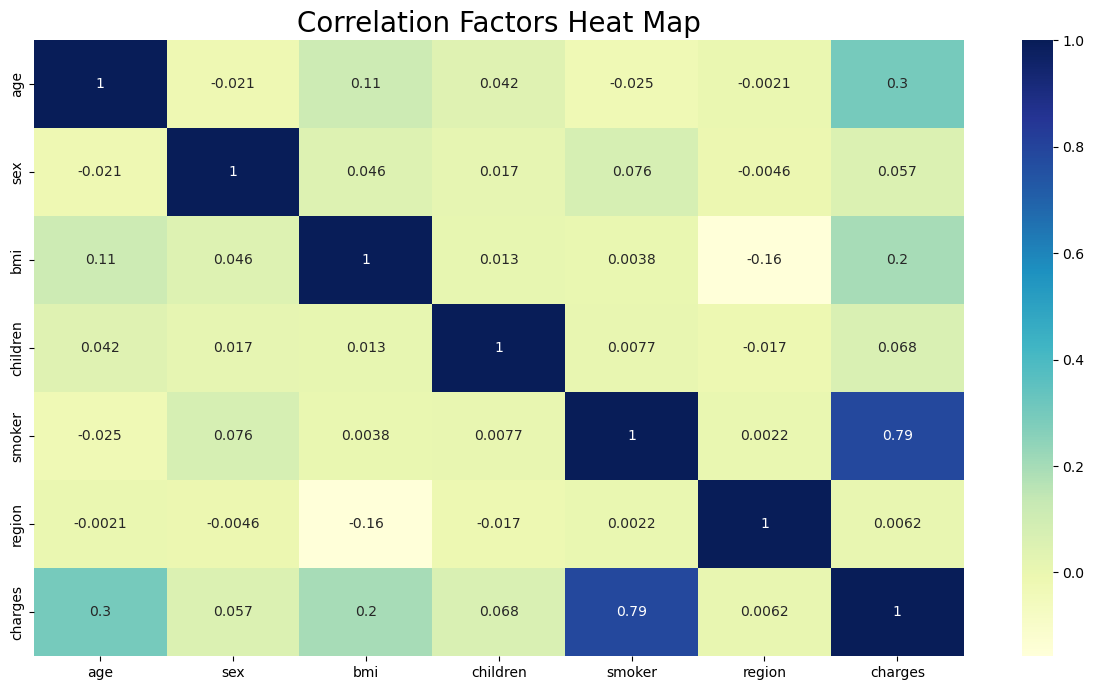

In [106]:
plt.figure(figsize=(15,8))
sns.heatmap(meddata.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

# Applying machine learning methods for the dataset

In [191]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [192]:
features = meddata.drop(['charges'], axis = 1)
targets = meddata['charges']

In [193]:
x_train, x_test, y_train, y_test = holdout(features, targets, test_size = 0.2, random_state = 0)

In [194]:
x_train

,age,sex,bmi,children,smoker,region
621,37,1,34.100,4,1,1
194,18,1,34.430,0,0,2
240,23,0,36.670,2,1,4
1168,32,1,35.200,2,0,1
1192,58,0,32.395,1,0,4
...,...,...,...,...,...,...
763,27,1,26.030,0,0,4
835,42,1,35.970,2,0,2
1216,40,1,25.080,0,0,2
559,19,1,35.530,0,0,3


In [195]:
y_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

#### The goal is to determine the insurance cost for an individual based on several factors. Therefore, this is a regression case. Regression models a target prediction value based on independent variables. We will use the following algorithms -

1.Linear Regression
2.Random Forest Regression
3.polynomial Regression

# 1.Linear Regression

In [197]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor as rfr


#NOW we have Model Training

In [198]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [199]:
from sklearn.metrics import r2_score, mean_squared_error

lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)

# Mean squared error
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)
print('MSE train data: {:.3}, \nMSE test data: {:.3}\n'.format(lr_train_mse, lr_test_mse))

# Root Mean Squared error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(lr_train_mse)), 
    np.sqrt(np.absolute(lr_train_mse))))

# R^2 - coefficient of determination
print('R2 train data: {:.3}, \nR2 test data: {:.3}\n'.format(
    r2_score(y_train,lr_train_pred),
    r2_score(y_test,lr_test_pred)))

# Model Score
print('Model Accuracy Score:', (lr.score(x_test, y_test))*100)

MSE train data: 3.77e+07, 
MSE test data: 3.18e+07

RMSE train data: 6.14e+03, 
RMSE test data: 6.14e+03

R2 train data: 0.737, 
R2 test data: 0.8

Model Accuracy Score: 79.9874714544996


# 2.RandomForest Regressor

In [200]:


RFR = rfr(n_estimators = 100, criterion = 'mse', random_state = 0, n_jobs = -1)
RFR.fit(x_train, y_train)

x_train_predic = RFR.predict(x_train)
x_test_predic = RFR.predict(x_test)

# Mean squared error
train_mse = metrics.mean_squared_error(x_train_predic, y_train)
test_mse = metrics.mean_squared_error(x_test_predic, y_test)
print('Mean Squared Error train data: %.3f\nMean Squared Error test data: %.3f\n' % (train_mse, test_mse))

# Root Mean Squares error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(train_mse)), 
    np.sqrt(np.absolute(train_mse))))

# R^2 - coefficient of determination
print('R2 train data: %.3f\nR2 test data: %.3f\n' % (metrics.r2_score(x_train_predic, y_train),metrics.r2_score(x_test_predic, y_test)))

# Model Score
print('Model Accuracy Score:', (RFR.score(x_test, y_test))*100)

Mean Squared Error train data: 3776848.149
Mean Squared Error test data: 20722305.177

RMSE train data: 1.94e+03, 
RMSE test data: 1.94e+03

R2 train data: 0.971
R2 test data: 0.860

Model Accuracy Score: 86.9777477008644


# Feature Importance Ranking

1.smoker(0.606920)
2.bmi(0.215194)
3.age(0.136182)
4.children(0.021566)
5.region(0.014313)
6.sex(0.005825)


<BarContainer object of 6 artists>

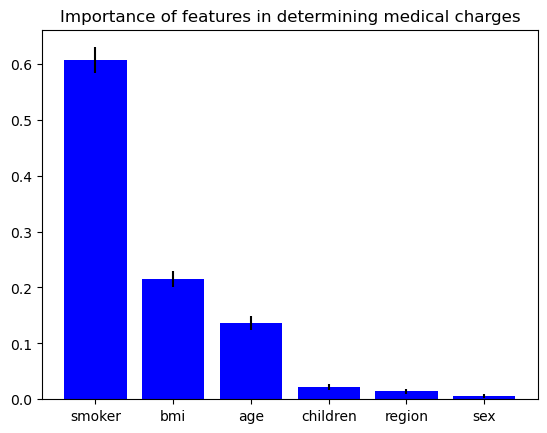

In [201]:
importances = RFR.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFR.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]
variables = ['age', 'sex','bmi', 'children','smoker','region']

imp_list = []
for value in range(features.shape[1]):
    variable = variables[indices[value]]
    imp_list.append(variable)
    print('%d.%s(%f)' % (value + 1, variable, importances[indices[value]]))
    
# Plotting the feature importances
plt.figure()
plt.title('Importance of features in determining medical charges')
plt.bar(imp_list, importances[indices], color = 'b', yerr = std[indices], align = 'center')

# Polynomial Regression

In [202]:
from sklearn.preprocessing import PolynomialFeatures
features = meddata.drop(['charges','sex','region'], axis = 1)
target = meddata.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(features)
x_train, x_test, y_train, y_test = holdout(x_pol, target, test_size = 0.2, random_state = 0)

In [203]:
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_predic = Pol_reg.predict(x_train)
y_test_predic = Pol_reg.predict(x_test)

print('Intercept:', Pol_reg.intercept_)
print('Coefficients:', Pol_reg.coef_)

# Model Score
print('\nModel Accuracy Score:', (Pol_reg.score(x_test, y_test))*100)

Intercept: -5325.8817052522045
Coefficients: [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]

Model Accuracy Score: 88.12595703345231


# Best Algorithm to choose for the given dataset

# Predicting the Medical charges

In [204]:
#Predicting the Medical Charges
y_test_predic = Pol_reg.predict(x_test)

# Creating a dataframe for comparing the Actual Values with the Predicted Values
final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_test_predic})
final_values

,Actual values,Predicted values
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


# conclusion


From observing  the above 3  models,Polynomial regression model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.
